In [6]:
import matplotlib.pyplot as plt
# Create labels for the x-axis (temperature ranges)
import pandas as pd
import numpy as np
from Helper_fun import generate_temp_range

In [10]:
t_deltas = [5]
agg_fact_list=[1,2,3,5,10]
min_temp_array, max_temp_array = generate_temp_range(t_deltas)
cloud_count=np.empty((len(agg_fact_list),len(min_temp_array)))
for i in range(len(min_temp_array)):
    for j in range(len(agg_fact_list)):
        agg_fact=agg_fact_list[j]
        min_temp=min_temp_array[i]
        max_temp=max_temp_array[i]
        df=pd.read_csv(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_{agg_fact}.csv")
        # total=df['is_liq']+df['is_mix']+df['is_ice']
        total=df['is_liq'].size
        # cloud_count[j,i]=total.astype(bool).sum(axis=0)
        cloud_count[j,i]=total


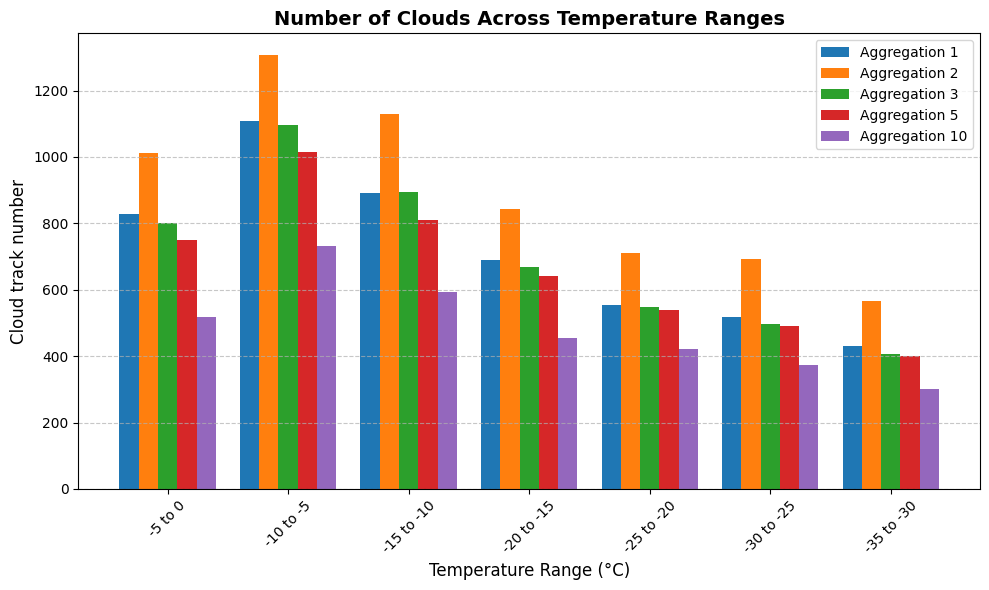

In [17]:
# Set up figure
plt.figure(figsize=(10,6))

# Define bar width and offsets
bar_width = 0.8/len(agg_fact_list)
x = np.arange(len(labels))

# Plot each bar set with an offset
for j in range(len(agg_fact_list)):
    plt.bar(x + j * bar_width, cloud_count[j, :], width=bar_width, label=f"Aggregation {agg_fact_list[j]}")

# Set x-axis labels
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45)

# Add title, labels, and grid
plt.title('Number of Clouds Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Cloud track number', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/WG_agg_n_clouds_original_included_11_11.png",dpi=400)
plt.show()


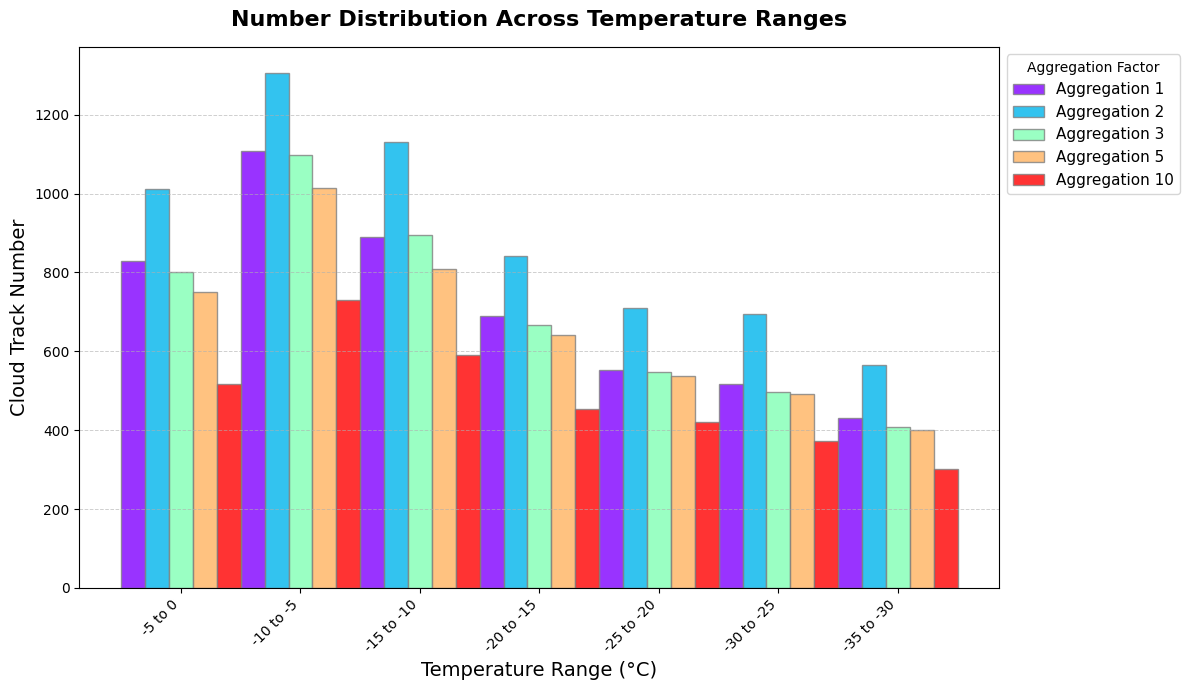

In [12]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]

# Set up figure
plt.figure(figsize=(12, 7))

# Define bar width and offsets
bar_width = 0.2
x = np.arange(len(labels))

# Define a rainbow color scheme
colors = plt.cm.rainbow(np.linspace(0, 1, len(agg_fact_list)))

# Plot each bar set with an offset and rainbow color scheme
for j in range(len(agg_fact_list)):
    plt.bar(
        x + j * bar_width, 
        cloud_count[j, :], 
        width=bar_width, 
        color=colors[j], 
        alpha=0.8, 
        edgecolor='grey', 
        label=f"Aggregation {agg_fact_list[j]}"
    )

# Set x-axis labels and align them in the center
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45, ha='right')

# Add title, labels, and a light grid
plt.title('Number Distribution Across Temperature Ranges', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Temperature Range (°C)', fontsize=14)
plt.ylabel('Cloud Track Number', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Move legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Aggregation Factor", fontsize=11)

# Adjust layout and show plot
plt.tight_layout()
plt.show()